In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 85)
sns.set_theme(context="paper", font_scale=1.5, style="ticks", rc={"axes.grid": True})

In [22]:
# Read Data from CSV (NEW DATA, NOT SCALED)
df = pd.read_csv("../data/abnormal_writeout_noscale.data.csv", index_col=0)

# trascurare da ACC a UVM
start_drop = df.columns.get_loc("ACC")
end_drop = df.columns.get_loc("UVM")
cols = np.arange(start_drop, end_drop + 1)
df.drop(df.columns[cols], axis=1, inplace=True)

# trascurare alcune colonne
# df.drop("TTT_freq", axis=1, inplace=True)
df.drop("oldest_phylostratum_factor", axis=1, inplace=True)
df.drop("gc_cds", axis=1, inplace=True) # ! New
df.drop("recomb_gene", axis=1, inplace=True) # ! New

# Drop NaNs
df.dropna(inplace=True)

# Sort features
resp = df["response"]
occ = df["occ_total_sum"]
age = df["oldest_phylostratum"]
conf = df.drop(labels=["response", "occ_total_sum", "oldest_phylostratum"], axis=1)

# Collect Features and Labels
features_df = pd.DataFrame()
features_df["occ_total_sum"] = occ
features_df["oldest_phylostratum"] = age
features_df = pd.concat([features_df, conf], axis=1)

X = features_df.to_numpy()
y = df["response"].to_numpy()

features_df.head(5)

occ_total_sum  oldest_phylostratum  cds_length  dnase_gene  dnase_cds  \
1                 33                 12.0        1488    0.612230   0.758065   
10                28                  1.0         873    0.086769   0.195876   
100               36                  1.0        1092    0.479295   0.611722   
1000             126                  1.0        2800    0.171524   0.280357   
10000             55                  1.0        1484    0.143843   0.030997   

       H3k4me1_gene  H3k4me3_gene  H3k27ac_gene  H3k4me1_cds  H3k4me3_cds  \
1          0.561429      1.000000      0.216855     0.661290     1.000000   
10         0.657839      0.000000      0.000000     0.000000     0.000000   
100        0.851369      0.354628      0.618954     0.754579     0.030220   
1000       0.554023      0.052420      0.278492     0.270357     0.021429   
10000      0.400789      0.106455      0.457949     0.708221     0.030997   

       H3k27ac_cds  lamin_gene  repli_gene  nsome_gene  nsome_cds  \
1         0.198925         0.0    0.041809    0.809254   0.706453   
10        0.000000         1.0   -0.007148    0.828752   1.097018   
100       0.086996         0.0    0.040463    1.249600   1.354306   
1000      0.151429         0.0   -0.022495    0.921420   1.382249   
10000     0.659704         0.0   -0.000387    0.960747   1.196871   

       transcription_gene  repeat_gene  repeat_cds  AAA_freq  AAC_freq  \
1                6.798234     0.040516         0.0  0.004755  0.008152   
10               0.061963     0.002809         0.0  0.025258  0.019518   
100              6.081620     0.028404         0.0  0.018727  0.012172   
1000             2.254471     0.014520         0.0  0.022054  0.014823   
10000            1.080241     0.009545         0.0  0.039835  0.015797   

       AAG_freq  AAT_freq  ACA_freq  ACC_freq  ACG_freq  ACT_freq  AGA_freq  \
1      0.007473  0.002717  0.011549  0.026495  0.010870  0.008152  0.010190   
10     0.021814  0.024110  0.025258  0.018370  0.003444  0.012629  0.035591   
100    0.023408  0.003745  0.017790  0.024345  0.007491  0.014981  0.024345   
1000   0.022415  0.024946  0.022054  0.014100  0.006146  0.015546  0.024946   
10000  0.030220  0.025412  0.024038  0.012363  0.002747  0.019918  0.048077   

       AGC_freq  AGG_freq  AGT_freq  ATA_freq  ATC_freq  ATG_freq  ATT_freq  \
1      0.028533  0.019701  0.009511  0.000679  0.006114  0.010870  0.002038   
10     0.009185  0.016073  0.006889  0.016073  0.017222  0.010333  0.033295   
100    0.020599  0.025281  0.011236  0.003745  0.013109  0.019663  0.004682   
1000   0.016992  0.012292  0.015907  0.013377  0.021330  0.026392  0.017715   
10000  0.006868  0.015797  0.009615  0.020604  0.009615  0.032280  0.023352   

       CAA_freq  CAC_freq  CAG_freq  CAT_freq  CCA_freq  CCC_freq  CCG_freq  \
1      0.009511  0.019022  0.028533  0.007473  0.027174  0.031250  0.025136   
10     0.019518  0.011481  0.020666  0.022962  0.017222  0.008037  0.002296   
100    0.017790  0.016854  0.029963  0.017790  0.034644  0.022472  0.010300   
1000   0.026392  0.011931  0.027477  0.017354  0.023861  0.016992  0.006508   
10000  0.019918  0.012363  0.021978  0.015797  0.015110  0.003434  0.004121   

       CCT_freq  CGA_freq  CGC_freq  CGG_freq  CGT_freq  CTA_freq  CTC_freq  \
1      0.029891  0.015625  0.027174  0.019701  0.009511  0.007473  0.017663   
10     0.021814  0.003444  0.001148  0.004592  0.002296  0.008037  0.019518   
100    0.028090  0.005618  0.010300  0.014045  0.003745  0.015918  0.015918   
1000   0.019161  0.005785  0.003977  0.007954  0.003977  0.006146  0.010846   
10000  0.013049  0.005495  0.001374  0.002060  0.002060  0.013736  0.014423   

       CTG_freq  CTT_freq  GAA_freq  GAC_freq  GAG_freq  GAT_freq  GCA_freq  \
1      0.044837  0.013587  0.008832  0.021739  0.031250  0.008152  0.016984   
10     0.022962  0.019518  0.033295  0.013777  0.019518  0.011481  0.014925   
100    0.033708  0.011236  0.014981  0.022472  0.026217  0.009363 

In [23]:
features_df.columns

Index(['occ_total_sum', 'oldest_phylostratum', 'cds_length', 'dnase_gene',
       'dnase_cds', 'H3k4me1_gene', 'H3k4me3_gene', 'H3k27ac_gene',
       'H3k4me1_cds', 'H3k4me3_cds', 'H3k27ac_cds', 'lamin_gene', 'repli_gene',
       'nsome_gene', 'nsome_cds', 'transcription_gene', 'repeat_gene',
       'repeat_cds', 'AAA_freq', 'AAC_freq', 'AAG_freq', 'AAT_freq',
       'ACA_freq', 'ACC_freq', 'ACG_freq', 'ACT_freq', 'AGA_freq', 'AGC_freq',
       'AGG_freq', 'AGT_freq', 'ATA_freq', 'ATC_freq', 'ATG_freq', 'ATT_freq',
       'CAA_freq', 'CAC_freq', 'CAG_freq', 'CAT_freq', 'CCA_freq', 'CCC_freq',
       'CCG_freq', 'CCT_freq', 'CGA_freq', 'CGC_freq', 'CGG_freq', 'CGT_freq',
       'CTA_freq', 'CTC_freq', 'CTG_freq', 'CTT_freq', 'GAA_freq', 'GAC_freq',
       'GAG_freq', 'GAT_freq', 'GCA_freq', 'GCC_freq', 'GCG_freq', 'GCT_freq',
       'GGA_freq', 'GGC_freq', 'GGG_freq', 'GGT_freq', 'GTA_freq', 'GTC_freq',
       'GTG_freq', 'GTT_freq', 'TAA_freq', 'TAC_freq', 'TAG_freq', 'TAT_freq',
     

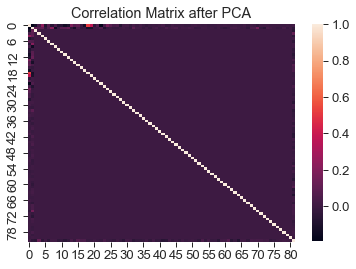

82 total features.
Confounder columns start from index 2 of feature matrix.
Non-counfounders: ['occ_total_sum', 'oldest_phylostratum']


occ_total_sum  oldest_phylostratum  cds_length  dnase_gene  dnase_cds  \
1                 33                 12.0        1488    0.612230   0.758065   
10                28                  1.0         873    0.086769   0.195876   
100               36                  1.0        1092    0.479295   0.611722   
1000             126                  1.0        2800    0.171524   0.280357   
10000             55                  1.0        1484    0.143843   0.030997   
...              ...                  ...         ...         ...        ...   
999              208                  1.0        2649    0.313496   0.427709   
9990              88                  1.0        4035    0.159518   0.305328   
9991              37                  2.0        2043    0.164623   0.025453   
9992              14                 12.0         372    0.166620   0.572581   
9993              53                  6.0        1994    0.362039   0.633400   

       H3k4me1_gene  H3k4me3_gene  H3k27ac_gene  H3k4me1_cds  H3k4me3_cds  \
1          0.561429      1.000000      0.216855     0.661290     1.000000   
10         0.657839      0.000000      0.000000     0.000000     0.000000   
100        0.851369      0.354628      0.618954     0.754579     0.030220   
1000       0.554023      0.052420      0.278492     0.270357     0.021429   
10000      0.400789      0.106455      0.457949     0.708221     0.030997   
...             ...           ...           ...          ...          ...   
999        0.721323      0.380132      0.560000     0.371461     0.147603   
9990       0.618466      1.000000      0.379258     0.538290     1.000000   
9991       0.748995      0.710461      0.872609     0.785120     0.786099   
9992       0.857123      0.861899      1.000000     1.000000     1.000000   
9993       1.000000      0.789180      0.721653     1.000000     0.266800   

       H3k27ac_cds  lamin_gene  repli_gene  nsome_gene  nsome_cds  \
1         0.198925         0.0    0.041809    0.809254   0.706453   
10        0.000000         1.0   -0.007148    0.828752   1.097018   
100       0.086996         0.0    0.040463    1.249600   1.354306   
1000      0.151429         0.0   -0.022495    0.921420   1.382249   
10000     0.659704         0.0   -0.000387    0.960747   1.196871   
...            ...         ...         ...         ...        ...   
999       0.375613         0.0    0.051321    1.156640   1.677763   
9990      0.578686         0.0    0.032907    0.952004   1.596068   
9991      1.000000         0.0    0.045040    0.865913   1.245576   
9992      1.000000         0.0    0.017871    1.277585   1.767925   
9993      0.511535         0.0    0.047280    2.501995   2.685192   

       transcription_gene  repeat_gene  repeat_cds  AAA_freq  AAC_freq  \
1                6.798234     0.040516         0.0  0.004755  0.008152   
10               0.061963     0.002809         0.0  0.025258  0.019518   
100              6.081620     0.028404         0.0  0.018727  0.012172   
1000             2.254471     0.014520         0.0  0.022054  0.014823   
10000            1.080241     0.009545         0.0  0.039835  0.015797   
...                   ...          ...         ...       ...       ...   
999             12.624956     0.019776         0.0  0.016813  0.015285   
9990             4.338614     0.013269         0.0  0.019613  0.013327   
9991             7.591840     0.014049         0.0  0.024463  0.007988   
9992             0.136402     0.020090         0.0  0.018919  0.013514   
9993            11.936696     0.027329         0.0  0.004061  0.008122   

       AAG_freq  AAT_freq  ACA_freq  ACC_freq  ACG_freq  ACT_freq  AGA_freq  \
1      0.007473  0.002717  0.011549  0.026495  0.010870  0.008152  0.010190   
10     0.021814  0.024110  0.025258  0.018370  0.003444  0.012629  0.035591   
100    0.023408  0.003745  0.017790  0.024345  0.007491  0.014981  0.024345   
1000   0.022415  0.024946  0.022054  0.014100  0.006146  0.015546  0.024946   
10000  0

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Columns of confounder variables (highly colinear)
conf_index = 2
conf_cols = np.arange(2, X.shape[1])


class ConfounderPCA(BaseEstimator, TransformerMixin):
    """ 
    Custom PCA transformer for this dataset.
    Applies PCA only to the many collinear confounder 
    variables.
    
    cols - columns to which PCA will be applied.
    
    n_components - same as with the "vanilla" PCA. 
        If 0 < n_components < 1, select the number of 
        components such that the amount of variance that 
        needs to be explained is greater than the 
        percentage specified by n_components.
        
    apply_PCA - if false, simply returns the untransformed data.
    """

    def __init__(self, cols, n_components=None, apply_PCA=True):
        self.n_components = n_components
        self.apply_PCA = apply_PCA
        self.cols = cols
        if self.apply_PCA:
            self.pca = PCA(n_components=self.n_components)

    def fit(self, X, y=None):
        if self.apply_PCA:
            self.pca.fit(X[:, self.cols])
        return self

    def transform(self, X, y=None):
        if self.apply_PCA:
            X_pca = self.pca.transform(X[:, self.cols])
            return np.c_[X[:, :2], X_pca]
        else:
            return X


sns.heatmap(
    pd.DataFrame(
        ConfounderPCA(cols=np.arange(2, X.shape[1])).fit_transform(StandardScaler().fit_transform(X))
    ).corr()
)
plt.title("Correlation Matrix after PCA")
plt.show()

print(X.shape[1], "total features.")
print("Confounder columns start from index", conf_index, "of feature matrix.")
print("Non-counfounders:", features_df.iloc[:, 0:conf_index].columns.tolist())

features_df

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Model definition
lr_clf = Pipeline([
    # Apply scaling
    ("scaler", StandardScaler()),
    # Then apply PCA to the confounder variables, keeping all principal components
    ("pca", ConfounderPCA(n_components=None, cols=np.arange(2, X.shape[1]))),
    # Fit the l2 regularized logistic regression
    ("lr", LogisticRegression(max_iter=2000, penalty='none')),
])

# Model training
lr_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca',
                 ConfounderPCA(cols=array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]))),
                ('lr', LogisticRegression(max_iter=2000, penalty='none'))])

In [30]:
# Collect the coefficients into a pandas dataframe
coef_df = pd.DataFrame(lr_clf["lr"].coef_.T, columns=["Beta"])

# Label the first two variables, and name the PCs "PC 1", etc
coef_df.rename(index={0 : "occ_total_sum", 1 : "oldest_phylostratum"}, inplace=True)
coef_df.rename(index=lambda s: s-1 if isinstance(s, int) else s, inplace=True)
coef_df.rename(index=lambda s: f"PC {s}" if isinstance(s, int) else s, inplace=True)

# Print the dataframe sorted by absolute value of coefficients
coef_df.sort_values(by="Beta", key=abs, ascending=False).head(5)

Beta
PC 69 -2.303909
PC 78  2.230583
PC 76  1.494420
PC 72 -1.212662
PC 66  0.864318

### PC Loadings

In [27]:
# collect the loadings of the pca object into a pandas dataframe
loadings_df = pd.DataFrame(lr_clf["pca"].pca.components_.T, index = features_df.columns[2:])

# Rename PCs
loadings_df.rename(columns=lambda s: f"PC {s+1}", inplace=True)

# Get the indices of the top principal components
idx = coef_df[2:].sort_values(by="Beta", key=abs, ascending=False).index

# Print the loadings with columns (components) sorted by absolute value of their coefficient
loadings_df.loc[:, idx].T.head(2)

cds_length  dnase_gene  dnase_cds  H3k4me1_gene  H3k4me3_gene  \
PC 69    0.011053   -0.001253  -0.002661      0.000054     -0.002217   
PC 78   -0.000335   -0.000087   0.000179      0.000175      0.000075   

       H3k27ac_gene  H3k4me1_cds  H3k4me3_cds  H3k27ac_cds  lamin_gene  \
PC 69      0.001596    -0.000751    -0.003689    -0.000427   -0.000779   
PC 78     -0.000238     0.000151    -0.000724     0.000368   -0.000185   

       repli_gene  nsome_gene  nsome_cds  transcription_gene  repeat_gene  \
PC 69    0.001052   -0.000085   0.000364           -0.000416     0.001522   
PC 78   -0.000181   -0.000227   0.000177           -0.000286    -0.000022   

       repeat_cds  AAA_freq  AAC_freq  AAG_freq  AAT_freq  ACA_freq  ACC_freq  \
PC 69   -0.003804  0.006081 -0.015813 -0.087498 -0.226680 -0.029059  0.009398   
PC 78   -0.000012  0.000244  0.023723 -0.008530  0.002572 -0.041450 -0.068431   

       ACG_freq  ACT_freq  AGA_freq  AGC_freq  AGG_freq  AGT_freq  ATA_freq  \
PC 69  0.040544 -0.063183  0.242887  0.105760  0.246302  0.100304  0.069187   
PC 78 -0.023859 -0.035284 -0.000799  0.010303  0.004194  0.000551 -0.385655   

       ATC_freq  ATG_freq  ATT_freq  CAA_freq  CAC_freq  CAG_freq  CAT_freq  \
PC 69  0.075598 -0.000347  0.032489  0.053021  0.038379 -0.009842 -0.105587   
PC 78  0.099291  0.000133  0.019950  0.016705  0.041627  0.012264  0.014469   

       CCA_freq  CCC_freq  CCG_freq  CCT_freq  CGA_freq  CGC_freq  CGG_freq  \
PC 69 -0.051116  0.008696  0.084499 -0.122351  0.037520 -0.018859  0.157535   
PC 78  0.038712  0.000939  0.060893  0.035918  0.000012  0.016699  0.006088   

       CGT_freq  CTA_freq  CTC_freq  CTG_freq  CTT_freq  GAA_freq  GAC_freq  \
PC 69  0.014426  0.002935  0.029445 -0.112224 -0.035311 -0.147664 -0.079596   
PC 78  0.000841 -0.228267  0.159578  0.035606  0.033406  0.010845  0.027663   

       GAG_freq  GAT_freq  GCA_freq  GCC_freq  GCG_freq  GCT_freq  GGA_freq  \
PC 69 -0.201554 -0.237696 -0.070528 -0.073956  0.025429 -0.156008 -0.058711   
PC 78  0.001591  0.006929 -0.017240 -0.098811 -0.016040 -0.028340 -0.004256   

       GGC_freq  GGG_freq  GGT_freq  GTA_freq  GTC_freq  GTG_freq  GTT_freq  \
PC 69 -0.209166  0.003411 -0.046906 -0.095472 -0.090512 -0.242203 -0.157932   
PC 78  0.010566  0.000110 -0.001808 -0.218138  0.083248  0.005884  0.015629   

       TAA_freq  TAC_freq  TAG_freq  TAT_freq  TCA_freq  TCC_freq  TCG_freq  \
PC 69  0.107227  0.056620  0.029572 -0.070748   0.02924  0.069045   0.06975   
PC 78  0.368995  0.274899  0.220793  0.404090  -0.13753 -0.173033  -0.08167   

       TCT_freq  TGA_freq  TGC_freq  TGG_freq  TGT_freq  TTA_freq  TTC_freq  \
PC 69 -0.028399  0.292105  0.259694  0.369873  0.246589  0.042529  0.062123   
PC 78 -0.156239 -0.008328  0.003394 -0.003583 -0.005064 -0.401371  0.103444   

       TTG_freq  TTT_freq  
PC 69 -0.025966  0.005146  
PC 78 -0.016990  0.000611

In [28]:
loadings_df # Scalate, centrate prima di pc

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
cds_length   -0.016649 -0.016021  0.102405 -0.012661  0.053744  0.012425   
dnase_gene    0.148983 -0.041788 -0.110645  0.095505  0.050084 -0.008040   
dnase_cds     0.143748 -0.037699 -0.075436  0.048654  0.037245 -0.023941   
H3k4me1_gene  0.076835 -0.090011 -0.184354  0.317686  0.091469  0.042687   
H3k4me3_gene  0.056035 -0.106181 -0.238544  0.240471  0.098783  0.058157   
...                ...       ...       ...       ...       ...       ...   
TGT_freq     -0.089213  0.193226 -0.043969  0.054747 -0.130166  0.064390   
TTA_freq     -0.167811  0.002437 -0.114816 -0.042506  0.018714  0.085507   
TTC_freq     -0.097928  0.178981 -0.082074  0.018177  0.060167 -0.078478   
TTG_freq     -0.144648  0.069302 -0.099457  0.067894 -0.137365  0.069111   
TTT_freq     -0.152802  0.077839 -0.122801 -0.010657 -0.036466  0.047498   

                  PC 7      PC 8      PC 9     PC 10     PC 11     PC 12  \
cds_length    0.034494 -0.065910 -0.028481 -0.161282 -0.172344  0.228832   
dnase_gene   -0.001065  0.021605  0.050843  0.008535  0.020284 -0.064975   
dnase_cds    -0.022219  0.011361  0.023780 -0.017789 -0.081007 -0.070912   
H3k4me1_gene  0.019043  0.002144  0.002618  0.000070  0.022792  0.004822   
H3k4me3_gene -0.005510 -0.032520  0.132550 -0.010372  0.162134 -0.085256   
...                ...       ...       ...       ...       ...       ...   
TGT_freq      0.215181 -0.110882  0.074194  0.048101  0.003260  0.029589   
TTA_freq     -0.007549  0.015796 -0.006734 -0.106688 -0.041242  0.028442   
TTC_freq     -0.204919 -0.078153  0.103031 -0.066128 -0.129011 -0.101619   
TTG_freq     -0.058824 -0.022646 -0.113507  0.006092 -0.046617  0.082131   
TTT_freq     -0.108635 -0.012448 -0.031112 -0.091303 -0.064388  0.017395   

                 PC 13     PC 14     PC 15     PC 16     PC 17     PC 18  \
cds_length    0.117175  0.044411 -0.006397 -0.083077  0.661660  0.490490   
dnase_gene   -0.033546 -0.041923 -0.053890  0.089924 -0.070351  0.123464   
dnase_cds    -0.058366 -0.015104 -0.085619  0.072817 -0.102586  0.125403   
H3k4me1_gene  0.024684 -0.005372 -0.041148 -0.050066  0.020643 -0.120538   
H3k4me3_gene -0.056185  0.171818 -0.006444 -0.015974 -0.103667  0.144969   
...                ...       ...       ...       ...       ...       ...   
TGT_freq     -0.030604  0.128256 -0.099358 -0.147268 -0.115616  0.040137   
TTA_freq      0.075320 -0.007500 -0.017905  0.006076 -0.017242 -0.010207   
TTC_freq      0.034683  0.129494 -0.102385  0.224038 -0.031942 -0.038985   
TTG_freq      0.131387  0.084731 -0.023112  0.086288 -0.057878 -0.020780   
TTT_freq      0.140469  0.087721 -0.055765  0.085665 -0.048303 -0.054728   

                 PC 19     PC 20     PC 21     PC 22     PC 23     PC 24  \
cds_length    0.003981  0.020825 -0.233441  0.052978  0.258581  0.110004   
dnase_gene    0.004985  0.001783  0.020340 -0.057245  0.021967  0.114163   
dnase_cds     0.034589  0.066968  0.005695 -0.113684  0.015617  0.136733   
H3k4me1_gene  0.021595  0.003539 -0.099354 -0.052594  0.115788  0.371655   
H3k4me3_gene  0.186932 -0.022976 -0.190687  0.062853  0.073861 -0.254324   
...                ...       ...       ...       ...       ...       ...   
TGT_freq     -0.090761 -0.160787  0.196353 -0.133914  0.147138  0.026312   
TTA_freq     -0.060282  0.004074 -0.003354 -0.075850 -0.017398 -0.032234   
TTC_freq     -0.121207  0.047281  0.001077  0.307953  0.040171  0.157571   
TTG_freq     -0.116896  0.041728 -0.075582 -0.096318  0.123402 -0.135921   
TTT_freq     -0.134110  0.051570 -0.027161 -0.048752  0.069563 -0.026764   

                 PC 25     PC 26     PC 27     PC 28     PC 29     PC 30  \
cds_length    0.055625  0.043742 -0.103288  0.029260  0.019869 -0.010518   
dnase_gene   -0.014068 -0.018440 -0.112075 -0.054798 -0.279959 -0.034235   
dnase_cds     0.049507  0.022253 -0.176813 -0.110412 -0.385762 -0.045532   
H3k4me1_gene -0.271182  0.058777  0.158014  0.030168  0.030960

In [31]:
features_df.to_csv("./data/features_df.csv")
loadings_df.to_csv("./data/loadings_df.csv")